In [1]:
import pandas as pd


fmts = ['png', 'eps', 'svg', 'pdf']
figkw = dict(dpi=300, transparent=True)


dfs = pd.read_csv('Data_PFAs_Sediment.csv', index_col=0)
dfw = pd.read_csv('Data_PFAs_Water.csv', index_col=0)
dfr = pd.read_csv('Data_PFAs_River.csv', index_col=0)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
prop = sorted(set(dfw.columns.tolist() + dfs.columns.tolist() + dfr.columns.tolist()))

colors = dict(zip(prop, colors))
colors

{'FOSA': '#1f77b4',
 'PFBA': '#ff7f0e',
 'PFHxA': '#2ca02c',
 'PFOA': '#d62728',
 'PFOS': '#9467bd',
 'PFUnDA': '#8c564b'}

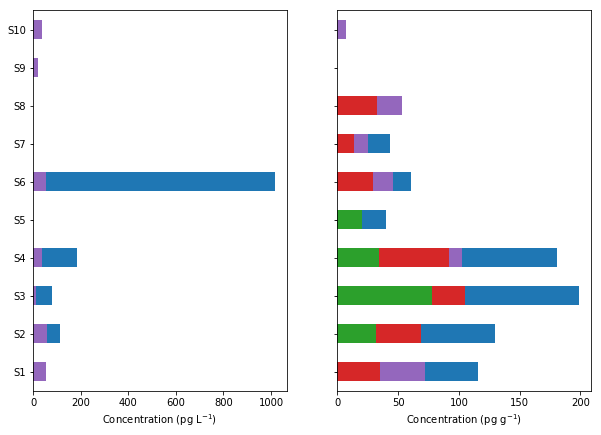

In [3]:
%matplotlib inline


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 7), sharey=True)

dfw.plot.barh(ax=ax0, stacked=True, legend=False, color=[colors[col] for col in dfw.columns])
ax0.set_ylabel('')
ax0.set_xlabel(r'Concentration (pg L$^{-1}$)')

dfs.plot.barh(ax=ax1, stacked=True, legend=False, color=[colors[col] for col in dfs.columns])
ax1.set_ylabel('')
ax1.set_xlabel(r'Concentration (pg g$^{-1}$)')

# fig.legend(bbox_to_anchor=(0.71, 0.84), loc='upper left', frameon=False)

for fmt in fmts:
    fig.savefig('sediment_and_water.{}'.format(fmt), format=fmt, **figkw)

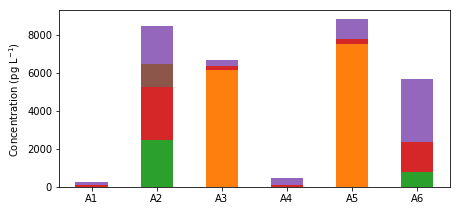

In [4]:
fig,ax = plt.subplots(figsize=(7, 3.25))

dfr.plot.bar(ax=ax, stacked=True, legend=False, rot=0, color=[colors[col] for col in dfr.columns])
ax.set_xlabel('')
ax.set_ylabel(r'Concentration (pg L$^{-1}$)')

# fig.legend(bbox_to_anchor=(0.9, 0.84), loc='upper left', frameon=False)

for fmt in fmts:
    fig.savefig('rivers.{}'.format(fmt), format=fmt, **figkw)

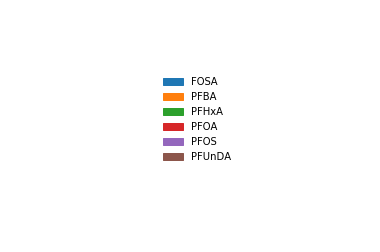

In [5]:
import matplotlib.patches as mpatches


patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in colors.items()]

plt.legend(patches, colors.keys(), loc='center', frameon=False)
plt.axis('off')

for fmt in fmts:
    plt.savefig('barh_legend_water.{}'.format(fmt), format=fmt, **figkw)